In [48]:
!python -m pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:0031m10.6 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [158]:
!python -m pip install wordcloud

In [256]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

# data preprocessing
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk import stem
from nltk import corpus
import re
from collections import Counter
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [222]:
#variables
EMAIL_DATA = "spam-email/email_spam.csv"

## Read dataset

In [223]:
data = pd.read_csv(EMAIL_DATA)
data.head(5)

title  \
0                                                        ?? the secrets to SUCCESS   
1                                                  ?? You Earned 500 GCLoot Points   
2                                                       ?? Your GitHub launch code   
3                                [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Need To Have A BLOCKBUSTER Saturday   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## EDA

In [224]:
data.columns

Index(['title', 'text', 'type'], dtype='object')

In [225]:
data.isnull().any()

title    False
text     False
type     False
dtype: bool

In [226]:
data.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [227]:
data.duplicated().any()

True

In [228]:
data.duplicated().sum()

1

In [229]:
orig_data = data
data = data.drop_duplicates(keep="first")
data.duplicated().sum()

0

In [230]:
orig_data.shape

(84, 3)

In [231]:
data.shape

(83, 3)

In [232]:
data.describe()

,title,text,type
count,83,83,83
unique,78,82,2
top,English,"We noticed a new login\nHello ondiekijohn254@gmail.com, we noticed an unusual login from a device or location you don't usually use.\nWas this you?",not spam
freq,3,2,57


### class distribution

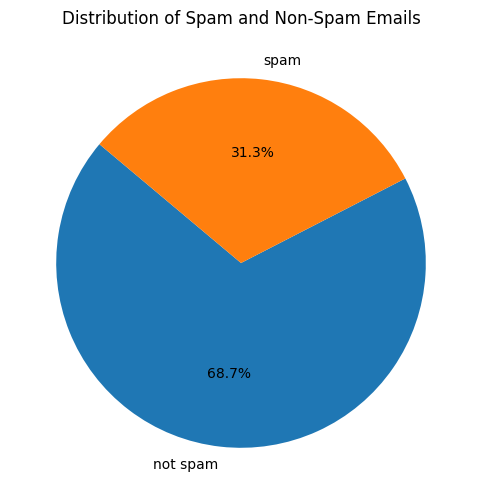

In [233]:

data["type"].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

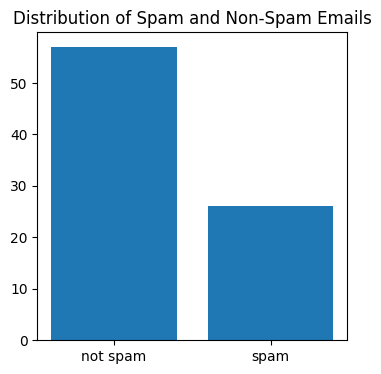

In [234]:
y=data['type'].value_counts()
x=data['type'].value_counts().index
# Plotting
plt.figure(figsize=(4,4))
plt.bar(x, y)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

### Average length of emails

In [235]:
data["email_length"] = data["text"].apply(len)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/172229719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["email_length"] = data["text"].apply(len)


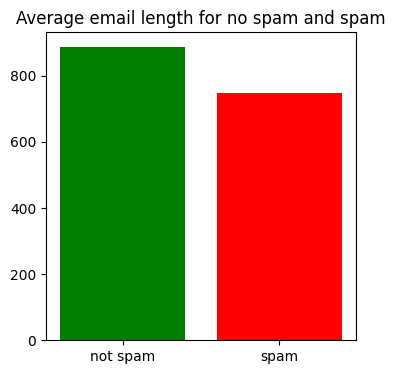

In [236]:
avg_spam_email_len = data[data["type"]=="spam"]["email_length"].mean()
avg_no_spam_email_len = data[data["type"]=="not spam"]["email_length"].mean()
y1 = [avg_no_spam_email_len, avg_spam_email_len]
x1 = data['type'].value_counts().index
# Plotting
plt.figure(figsize=(4,4))
plt.bar(x1, y1, color=['green', 'red'])
plt.title('Average email length for no spam and spam')
plt.show()

### Average number of words per email

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/888925892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_words"] = data["text"].apply(word_tokenize).apply(len)


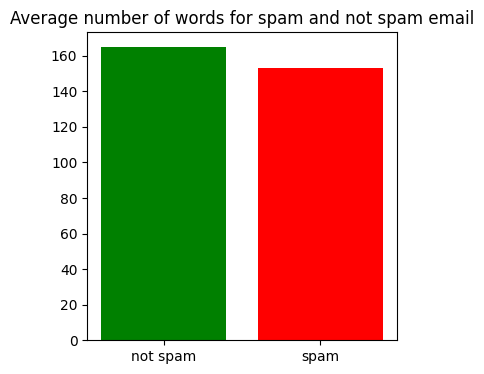

In [237]:
data["num_words"] = data["text"].apply(word_tokenize).apply(len)
avg_spam_num_words = data[data["type"]=="spam"]["num_words"].mean()
avg_no_spam_num_words = data[data["type"]=="not spam"]["num_words"].mean()
y2 = [avg_no_spam_num_words, avg_spam_num_words]
x2 = data['type'].value_counts().index
# Plotting
plt.figure(figsize=(4,4))
plt.bar(x2, y2, color=['green', 'red'])
plt.title('Average number of words for spam and not spam email')
plt.show()

### Average number of sentences for spam and not spam email

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/3234722982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_sentence"] = data["text"].apply(sent_tokenize).apply(len)


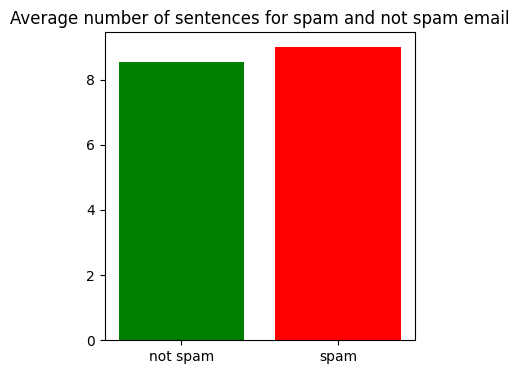

In [238]:
data["num_sentence"] = data["text"].apply(sent_tokenize).apply(len)
avg_spam_num_sentence = data[data["type"]=="spam"]["num_sentence"].mean()
avg_no_spam_num_sentence = data[data["type"]=="not spam"]["num_sentence"].mean()
y3 = [avg_no_spam_num_sentence, avg_spam_num_sentence]
x3 = data['type'].value_counts().index
# Plotting
plt.figure(figsize=(4,4))
plt.bar(x3, y3, color=['green', 'red'])
plt.title('Average number of sentences for spam and not spam email')
plt.show()

## Data preprocessing

In [239]:
pd.set_option("display.max_colwidth", None)
# convert email text to lowercase
# data["processed_data"] = data["text"].str.lower()
data["title_text"]  = data["title"] + data["text"]
data["processed_data"] = [x for x in data["title_text"]]
data["processed_data"].head(1)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/3816504281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["title_text"]  = data["title"] + data["text"]
/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/3816504281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_data"] = [x for x in data["title_text"]]


0    ?? the secrets to SUCCESSHi James,\n\nHave you claim your complimentary gift yet?\n\nI've compiled in here a special astrology gift that predicts everything about you in the future?\n\nThis is your enabler to take the correct actions now.\n\n>> Click here to claim your copy now >>\n\nClaim yours now, and thank me later.\n\n\nLove,\nHeather
Name: processed_data, dtype: object

In [240]:
# tokenization
data["processed_data"] = data["processed_data"].apply(word_tokenize)
data["processed_data"].head(1)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/3058447385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_data"] = data["processed_data"].apply(word_tokenize)


0    [?, ?, the, secrets, to, SUCCESSHi, James, ,, Have, you, claim, your, complimentary, gift, yet, ?, I, 've, compiled, in, here, a, special, astrology, gift, that, predicts, everything, about, you, in, the, future, ?, This, is, your, enabler, to, take, the, correct, actions, now, ., >, >, Click, here, to, claim, your, copy, now, >, >, Claim, yours, now, ,, and, thank, me, later, ., Love, ,, Heather]
Name: processed_data, dtype: object

In [241]:
# remove special characters
data["processed_data"] = data["processed_data"].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]','',word) for word in x])
data["processed_data"].head(1)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/4051831419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_data"] = data["processed_data"].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]','',word) for word in x])


0    [, , the, secrets, to, SUCCESSHi, James, , Have, you, claim, your, complimentary, gift, yet, , I, ve, compiled, in, here, a, special, astrology, gift, that, predicts, everything, about, you, in, the, future, , This, is, your, enabler, to, take, the, correct, actions, now, , , , Click, here, to, claim, your, copy, now, , , Claim, yours, now, , and, thank, me, later, , Love, , Heather]
Name: processed_data, dtype: object

In [242]:
# remove stopwords and punctuation
# stop_words = set(corpus.stopwords.words('english'))
# print(stop_words)
# print(string.punctuation)
data["processed_data"] = data["processed_data"].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])
data["processed_data"].head(1)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/3122508675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_data"] = data["processed_data"].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])


0    [secrets, SUCCESSHi, James, Have, claim, complimentary, gift, yet, I, compiled, special, astrology, gift, predicts, everything, future, This, enabler, take, correct, actions, Click, claim, copy, Claim, thank, later, Love, Heather]
Name: processed_data, dtype: object

In [243]:
# stemming
stemmer = stem.PorterStemmer()
data["processed_data"] = data["processed_data"].apply(lambda x: [stemmer.stem(word) for word in x])
data["processed_data"].head(5)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/2409748934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_data"] = data["processed_data"].apply(lambda x: [stemmer.stem(word) for word in x])


0                                                                                                                                                                                                                                                                                                                                                                                                                                                           [secret, successhi, jame, have, claim, complimentari, gift, yet, i, compil, special, astrolog, gift, predict, everyth, futur, thi, enabl, take, correct, action, click, claim, copi, claim, thank, later, love, heather]
1                                                                                                                                                                                                                                                                                                                                           [you, e

In [244]:
# join the array back to text
data["processed_data"] = data["processed_data"].apply(lambda x: ' '.join(x))
data["processed_data"].head(5)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/33586716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_data"] = data["processed_data"].apply(lambda x: ' '.join(x))


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Understanding the preprocessed data

### most common words in spam email

In [245]:
spam_emails = data[data["type"] == "spam"]["processed_data"]
# create a list of words in the spam email
spam_words = ' '.join(spam_emails).split()
#count the occurances of each word
word_count = Counter(spam_words)
#find the most common words in spam emails
most_common_words = word_count.most_common(10)
for w, cnt in most_common_words:
    print(f"{w} : {cnt}")

the : 28
click : 20
here : 18
today : 16
we : 15
get : 14
run : 13
i : 12
to : 12
if : 12


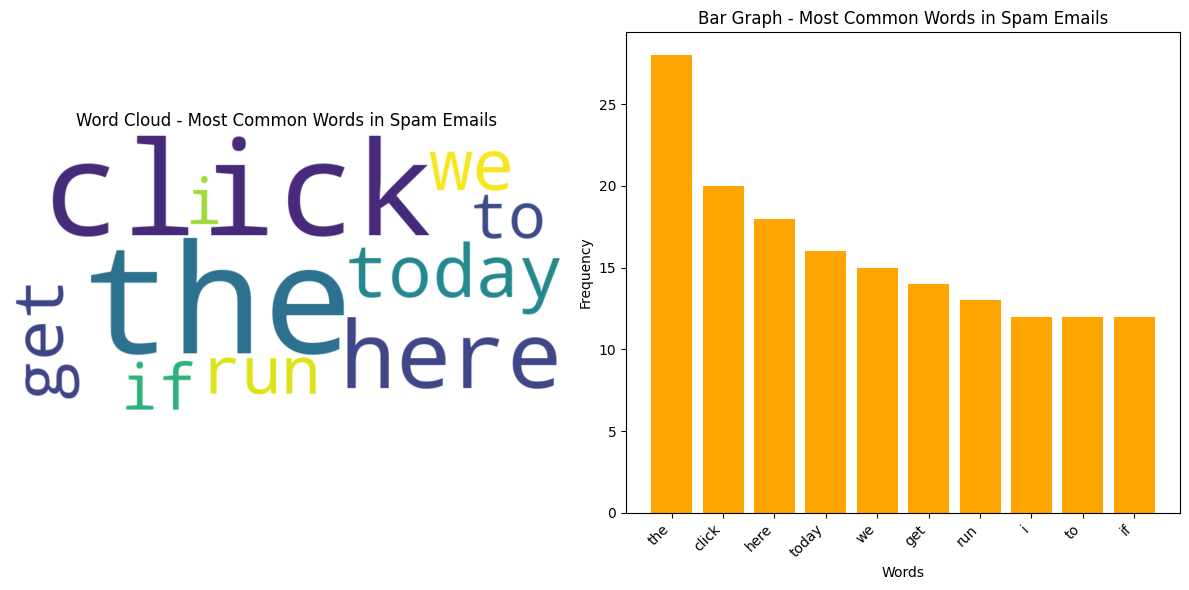

In [246]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))
# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Most Common Words in Spam Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph - Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### most common words in not-spam emails

In [247]:
not_spam_emails = data[data["type"] == "not spam"]["processed_data"]
# create a list of words in the spam email
not_spam_words = ' '.join(not_spam_emails).split()
#count the occurances of each word
word_count_ns = Counter(not_spam_words)
#find the most common words in spam emails
most_common_words_ns = word_count_ns.most_common(10)
for w, cnt in most_common_words_ns:
    print(f"{w} : {cnt}")

i : 69
email : 57
account : 50
compani : 43
pleas : 41
we : 39
servic : 36
logo : 34
if : 31
your : 30


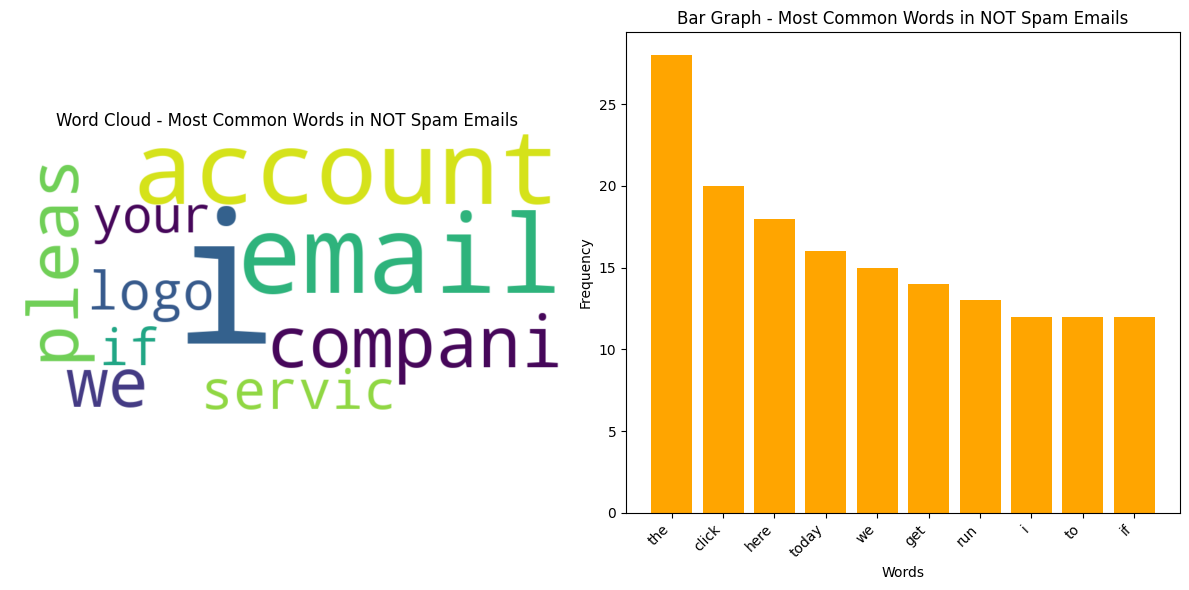

In [248]:
# Generate Word Cloud
wordcloud_ns = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words_ns))
# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ns, interpolation='bilinear')
plt.title('Word Cloud - Most Common Words in NOT Spam Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph - Most Common Words in NOT Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prepare data for machine learning

In [249]:
# covert categorical target column to numeric
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data.sample(2)

/var/folders/vp/02vjgqw50mq19c_st_3h5xfr0000gn/T/ipykernel_2194/4139466112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = encoder.fit_transform(data['type'])


,title,text,type,email_length,num_words,num_sentence,title_text,processed_data
61,Time is of the Essence!,"Dear Customer,\n\nThe 2022 filing season is almost coming to an end.\n\nAs of today, you only have 8 DAYS left to file your income tax returns.\n\nIf you have not yet started the filing process, now is the time to begin.\n\nLog on to itax.kra.go.ke today! Kumbuka kufile returns ni rahisi kuliko kucommute kukinyesha!\n\nDeadline to file is 30th June 2023\n\nFor any specific questions or concerns, don't hesitate to reach us on:\n\n020 4 999 999 or 0711 099 999 or email: callcentre@kra.go.ke\n\nIf you have filed your returns, kindly ignore this message.",1,540,111,6,"Time is of the Essence!Dear Customer,\n\nThe 2022 filing season is almost coming to an end.\n\nAs of today, you only have 8 DAYS left to file your income tax returns.\n\nIf you have not yet started the filing process, now is the time to begin.\n\nLog on to itax.kra.go.ke today! Kumbuka kufile returns ni rahisi kuliko kucommute kukinyesha!\n\nDeadline to file is 30th June 2023\n\nFor any specific questions or concerns, don't hesitate to reach us on:\n\n020 4 999 999 or 0711 099 999 or email: callcentre@kra.go.ke\n\nIf you have filed your returns, kindly ignore this message.",time essenc dear custom the 2022 file season almost come end as today 8 day left file incom tax return if yet start file process time begin log itaxkragok today kumbuka kufil return ni rahisi kuliko kucommut kukinyesha deadlin file 30th june 2023 for specif question concern nt hesit reach us 020 4 999 999 0711 099 999 email callcentr kragok if file return kindli ignor messag
64,TV LISENCE,Dear Sir/ Madam\n\nI have been receiving sms from the TV licence saying I am owing.\nI don't remember registering for TV lisence and also I don't own a TV. Neither am I working.\n\nPlease fix the issue. I don't really know what is going on.\n\nYours sincerely\nShocky \n,0,261,57,6,TV LISENCE Dear Sir/ Madam\n\nI have been receiving sms from the TV licence saying I am owing.\nI don't remember registering for TV lisence and also I don't own a TV. Neither am I working.\n\nPlease fix the issue. I don't really know what is going on.\n\nYours sincerely\nShocky \n,tv lisenc dear sir madam i receiv sm tv licenc say i owe i nt rememb regist tv lisenc also i nt tv neither i work pleas fix issu i nt realli know go your sincer shocki


In [250]:
#data spliting and vectorization
tfidf = TfidfVectorizer(max_features=30)
X = tfidf.fit_transform(data['processed_data']).toarray()
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling 

In [253]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.71
confusion Matrix : [[9 2]
 [3 3]]
Precision Score:  0.6


In [254]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_rf))
print("Precision Score: ",precision_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.71
confusion Matrix : [[9 2]
 [3 3]]
Precision Score:  0.6


In [257]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_nb))
print("Precision Score: ",precision_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.65
confusion Matrix : [[10  1]
 [ 5  1]]
Precision Score:  0.5


In [52]:
import numpy as np
import math
def linfit(xdat,ydat):
  # Here xbar and ybar are calculated
    xbar = np.sum(xdat)/len(xdat)
    ybar = np.sum(ydat)/len(ydat)
    print(xbar, ybar)

  # Insert calculation of m and c below
    sum_num = 0
    for i in range(len(xdat)):
        # print(i)
        diff_x_xbar = round((xdat[i] - xbar)*ydat[i],3)
        # print(diff_x_xbar)
        sum_num = sum_num + diff_x_xbar
    print(sum_num)
  
    sum_den = 0
    for cnt in range(len(xdat)):
        diff_x_xbar2 = round(round((xdat[cnt] - xbar),3)**2,3)
        sum_den = sum_den + diff_x_xbar2
    print(sum_den)
    
    m = sum_num / sum_den
    
    c = ybar - (m*xbar)
    
    # Return your values as [m, c]
    return [m, c]

In [53]:
x = [0.4, 0.5, 0.6, 0.7, 0.8]
y = [0.1, 0.25, 0.55, 0.75, 0.85]

m1, c1 = linfit(x, y)
print(m1)
print(c1)

0.6 0.5
0.2
0.1
2.0
-0.7
